In [13]:
from bs4 import BeautifulSoup
import requests

In [14]:
url = 'https://vibe.naver.com/today'
html_music = requests.get(url).text
soup_music = BeautifulSoup(html_music, 'lxml')

# 우리는 vibe 에서 차트를 들어가서 Top100 노래를 뽑고싶은데
# 홈피 첨 들어가면 팝업창이 가로막고있음
print(soup_music) 

<!DOCTYPE html>
<html lang="ko"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width,initial-scale=1,user-scalable=no" name="viewport"/><meta content="telephone=no" name="format-detection"/><meta content="좋아하는 음악은 물론, 좋아할 음악까지 들려주는 취향 저격 뮤직 서비스" name="description"/><meta content="app-id=1338631589" name="apple-itunes-app"/><meta content="website" property="og:type"/><meta content="https://music-phinf.pstatic.net/20201019_118/16031004163365Jexk_JPEG/about.jpg" property="og:image"/><meta content="NAVER VIBE(바이브)" property="og:title"/><meta content="#나만을 위한 음악이 듣고 싶을 땐 #내돈내듣 VIBE." property="og:description"/><meta content="https://vibe.naver.com" property="og:url"/><meta content="summary_large_image" name="twitter:card"/><meta content="https://music-phinf.pstatic.net/20201019_118/16031004163365Jexk_JPEG/about.jpg" name="twitter:image"/><meta content="NAVER VIBE(바이브)" name="twitter:title"/><meta content="NAVER VIBE(바이브)" name=

In [15]:
# 팝업창 자동클릭
# Top100으로 들어가지는거 자동클릭 등등
# 자동클릭 구현
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

In [16]:
driver = webdriver.Chrome(service=Service('driver/chromedriver'))
driver.get('https://vibe.naver.com/chart/total')

In [17]:
# 5행을 실행하면 뜨는 새창에서
# F12눌러서 팝업창 X표시의 태그를 찾음
# 태그 우클릭 -> Copy -> Copy Xpath
xpath = """//*[@id="app"]/div[2]/div/div/a[2]"""

# 자동으로 팝업창 X를 click헤줌
driver.find_element(By.XPATH, xpath).click()

In [18]:
soup = BeautifulSoup(driver.page_source, 'lxml')

<html data-platform="pc" data-platform-browser="" data-platform-detectpc="pc" data-platform-infomation="pc" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36" lang="ko"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="width=device-width,initial-scale=1,user-scalable=no" name="viewport"/><meta content="telephone=no" name="format-detection"/><meta content="좋아하는 음악은 물론, 좋아할 음악까지 들려주는 취향 저격 뮤직 서비스" name="description"/><meta content="app-id=1338631589" name="apple-itunes-app"/><meta content="website" property="og:type"/><meta content="https://music-phinf.pstatic.net/20201019_118/16031004163365Jexk_JPEG/about.jpg" property="og:image"/><meta content="NAVER VIBE(바이브)" property="og:title"/><meta content="#나만을 위한 음악이 듣고 싶을 땐 #내돈내듣 VIBE." property="og:description"/><meta content="https://vibe.naver.com" property="og:url"/><meta content="summary_large_image" name="twitter:
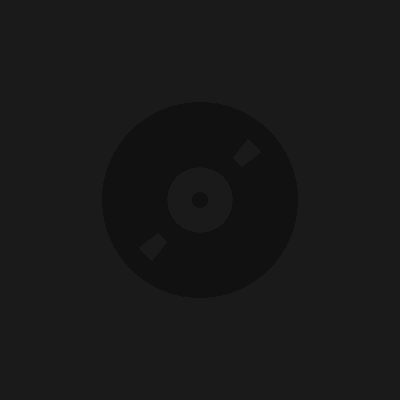
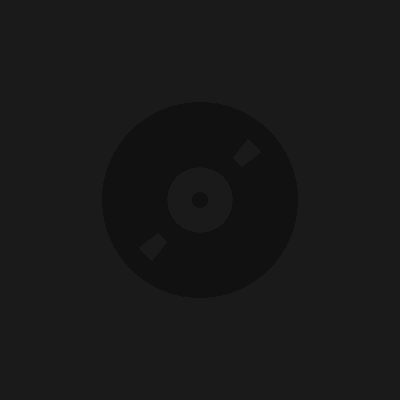
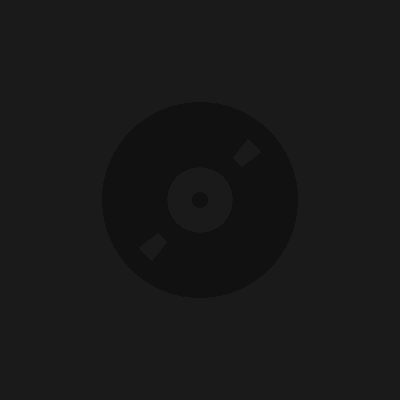
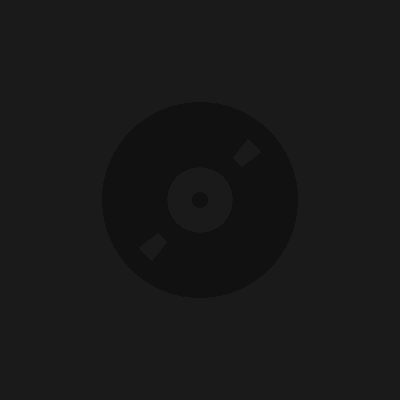
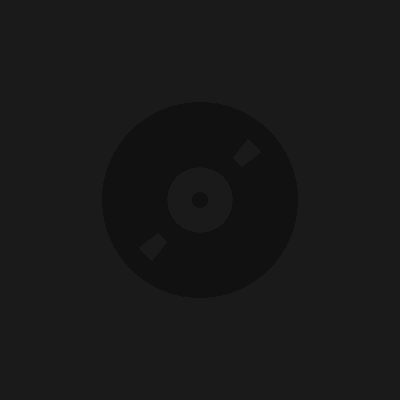
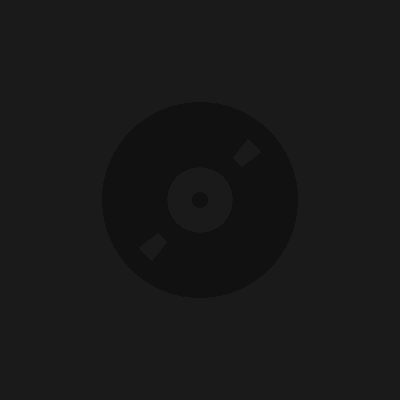
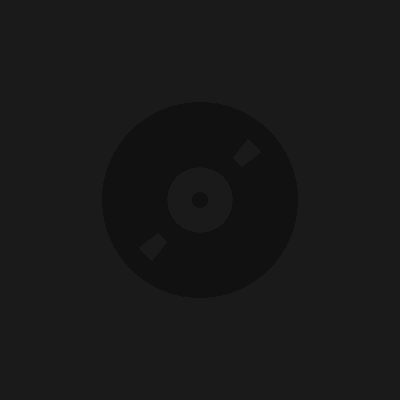
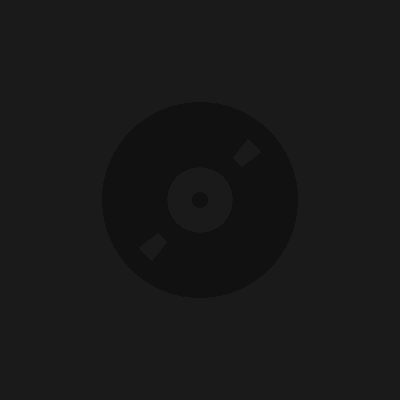
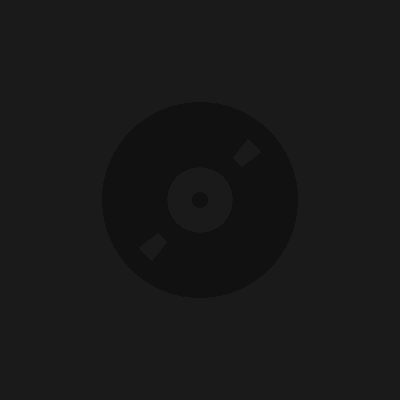
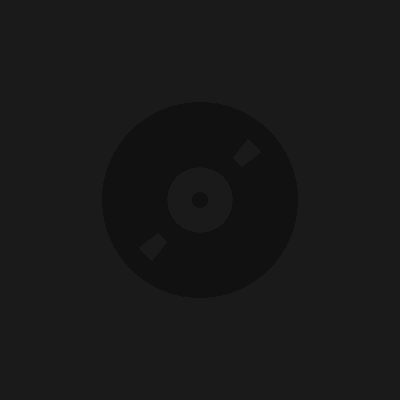
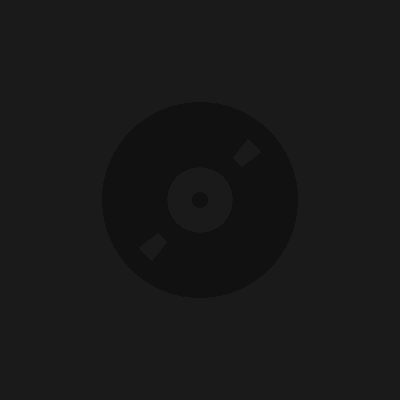
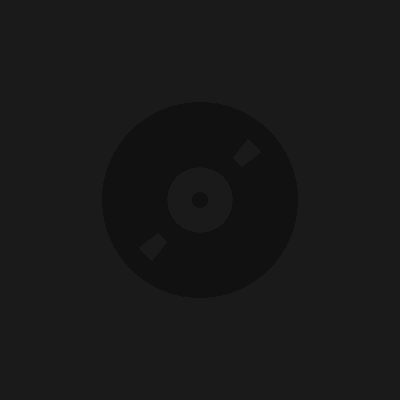
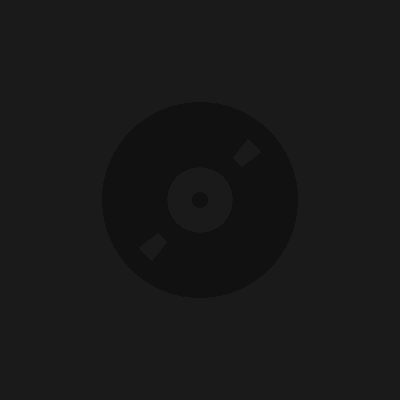
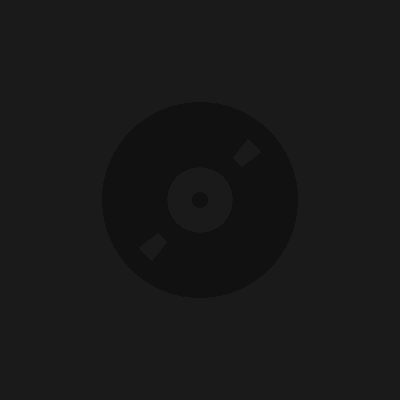
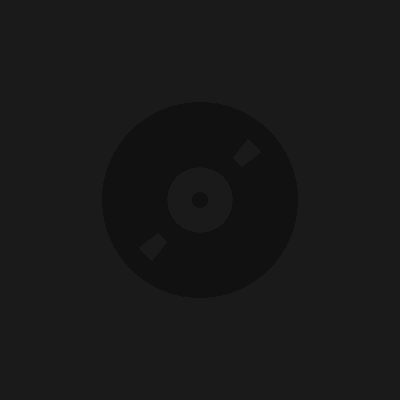
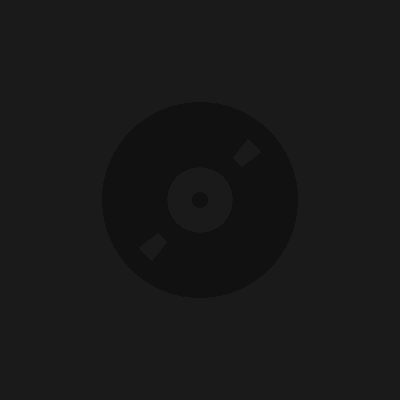
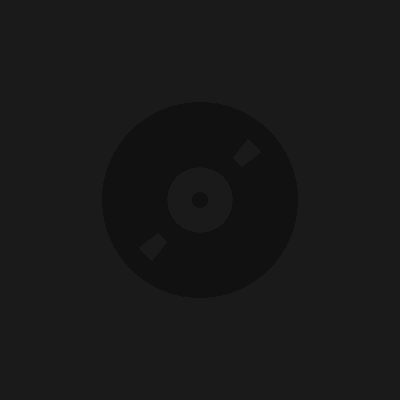
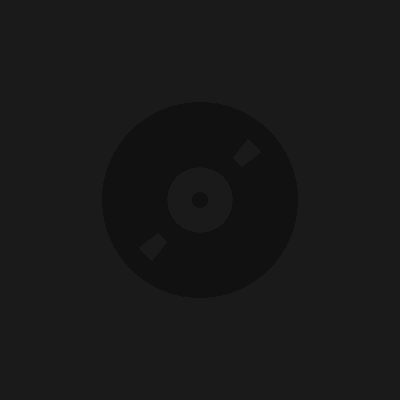
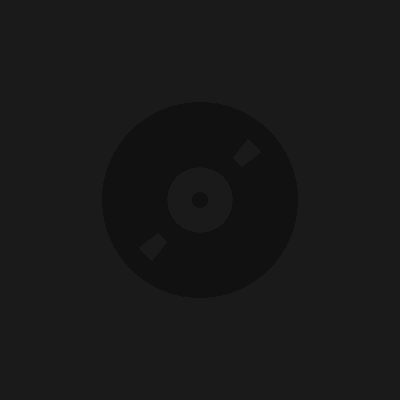
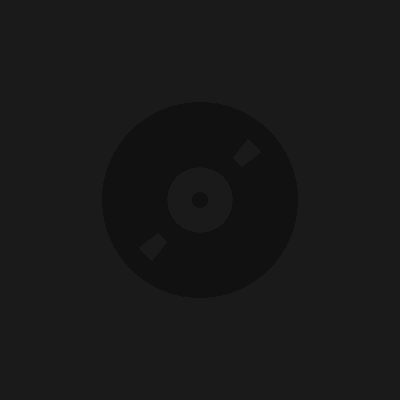
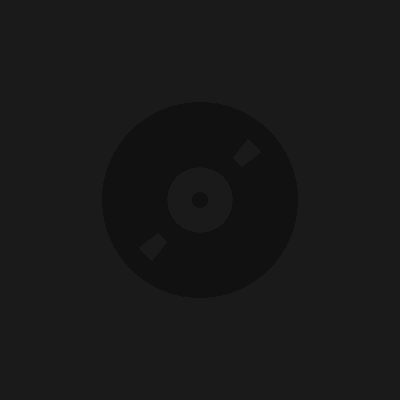
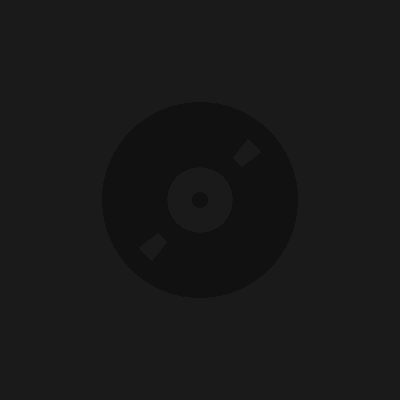
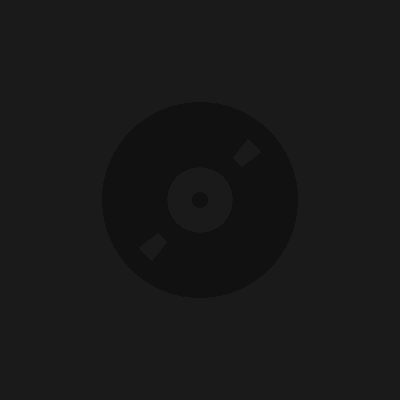
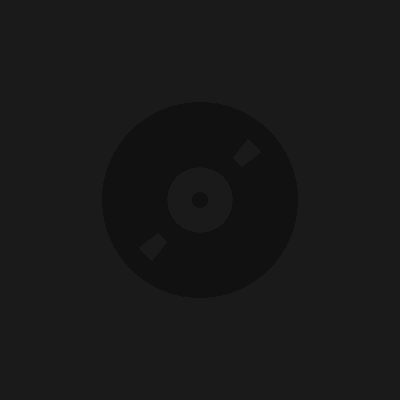
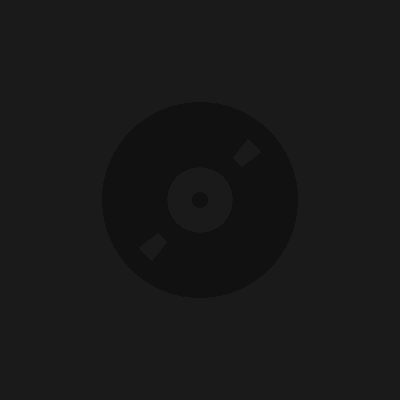
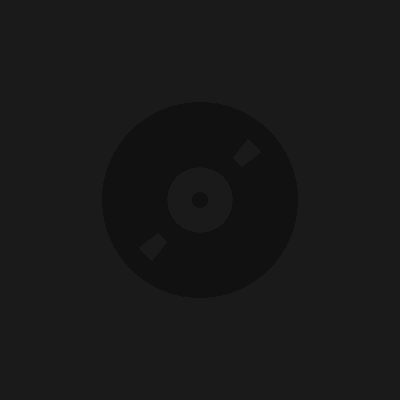
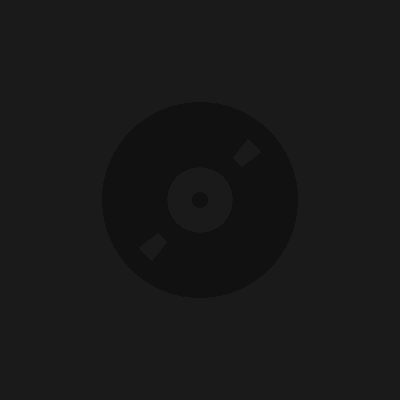
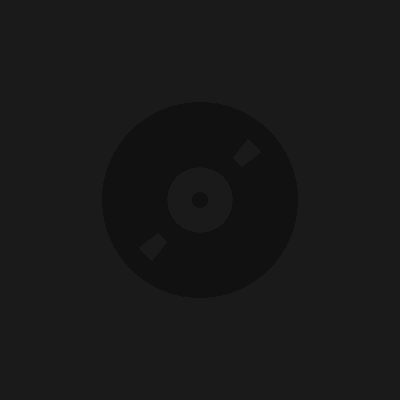
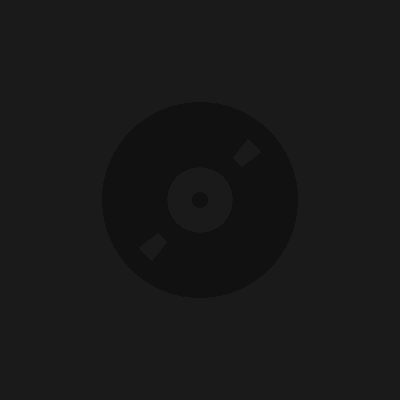
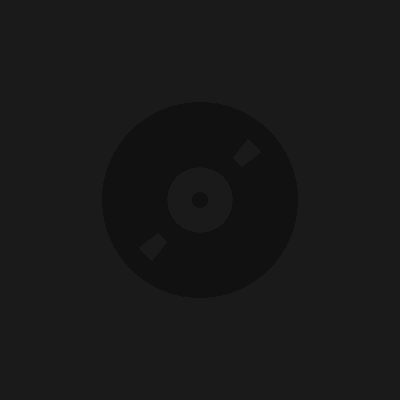
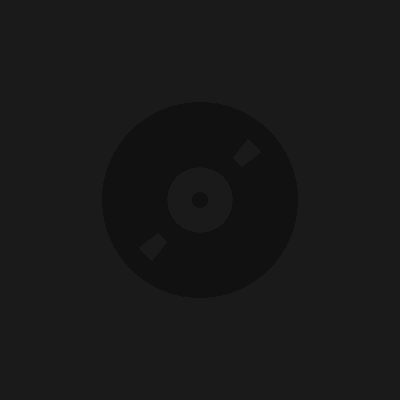
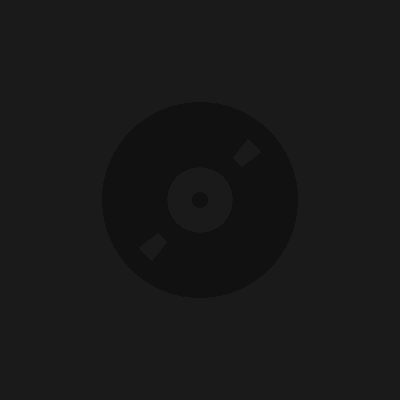
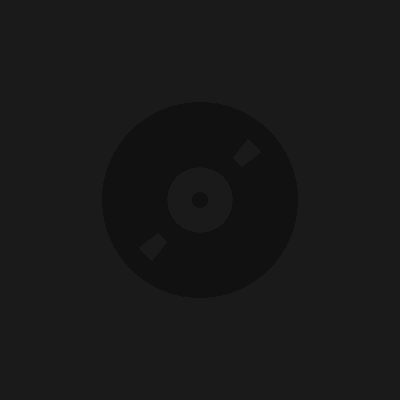
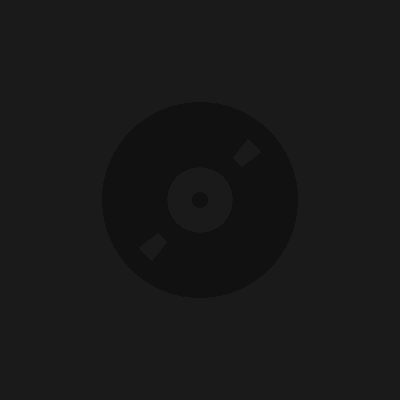
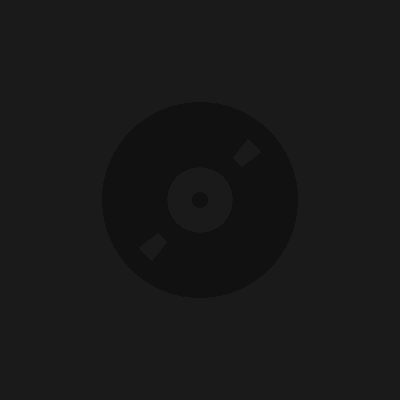
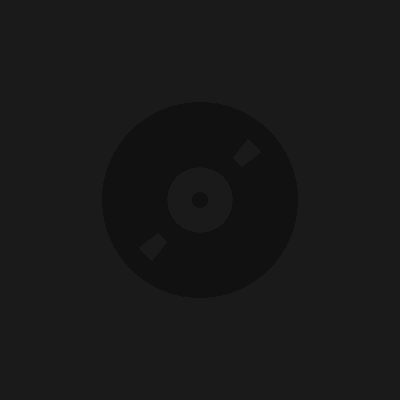
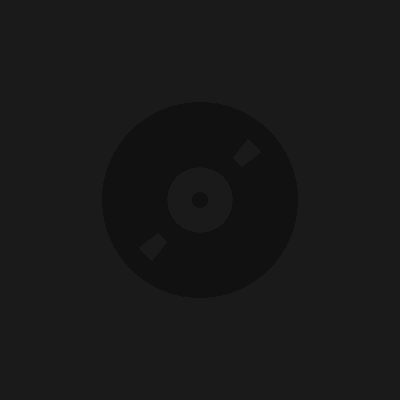
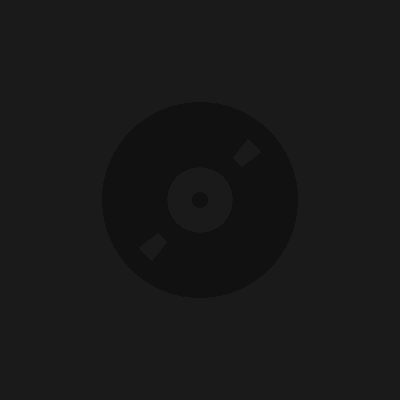
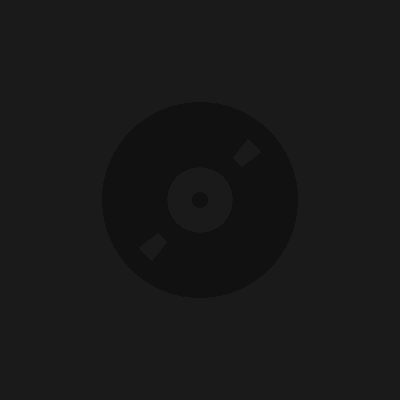
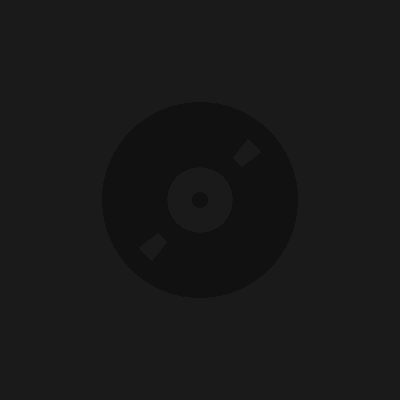
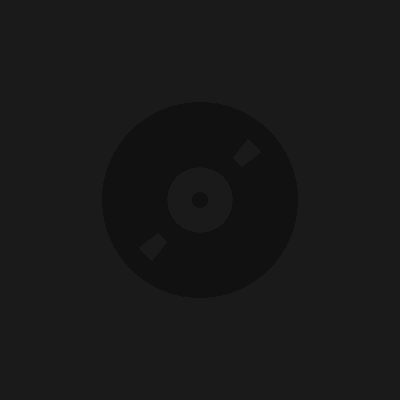
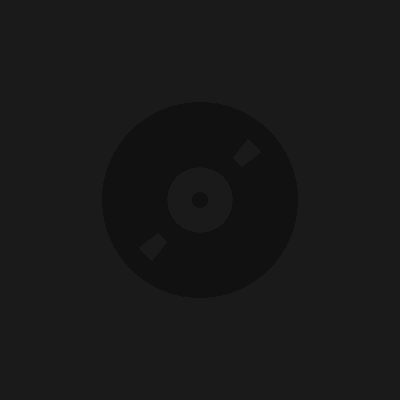
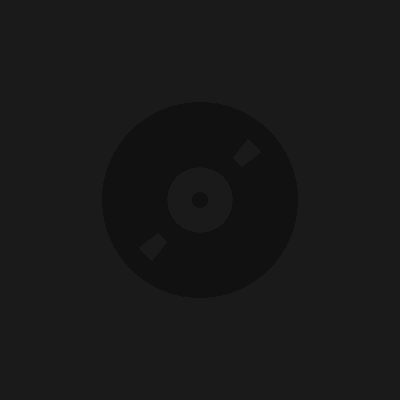
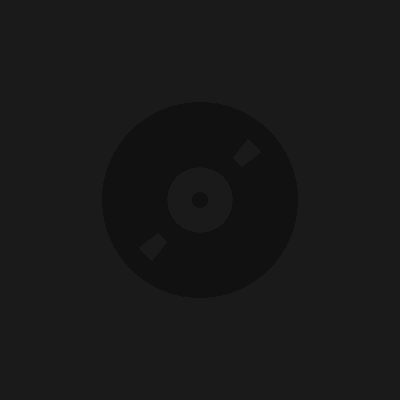
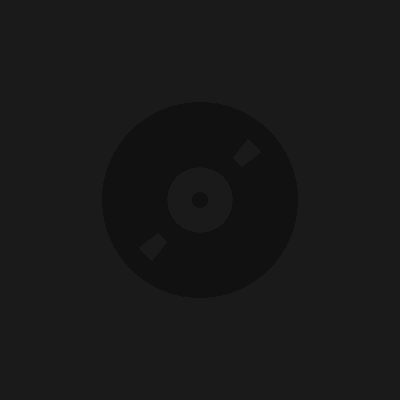
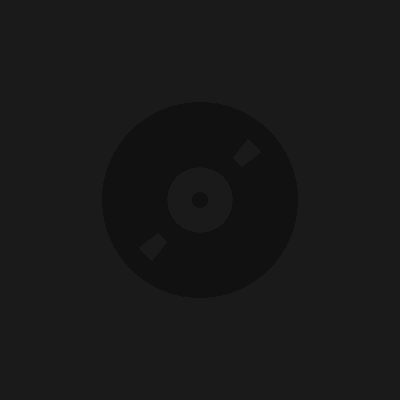
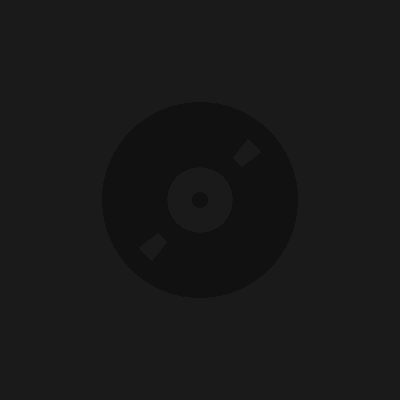
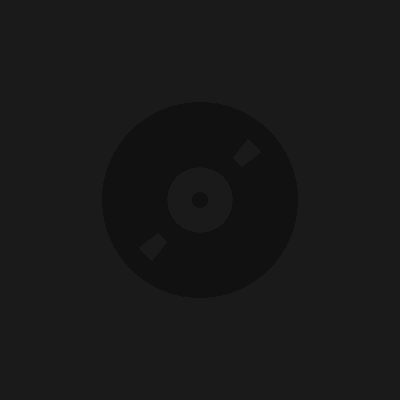
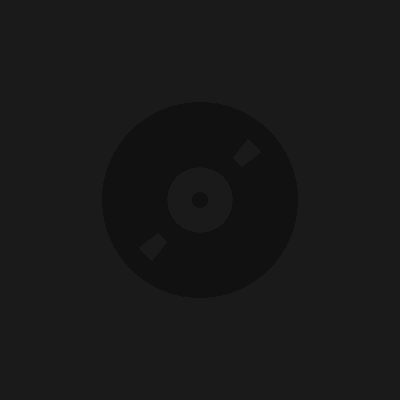
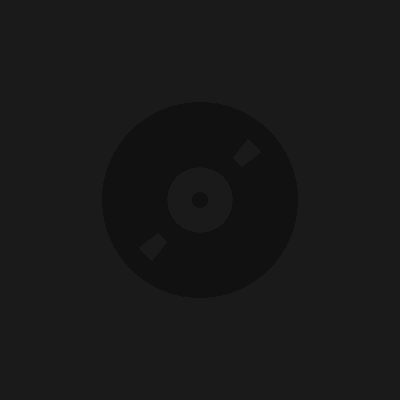
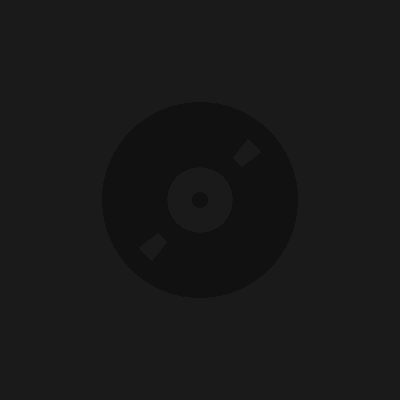
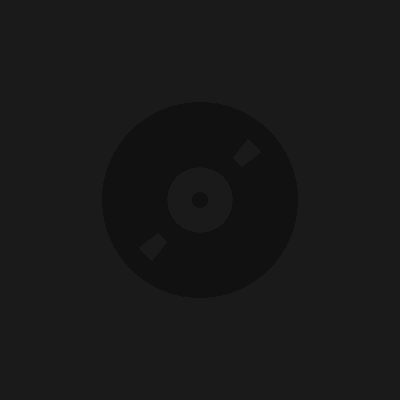
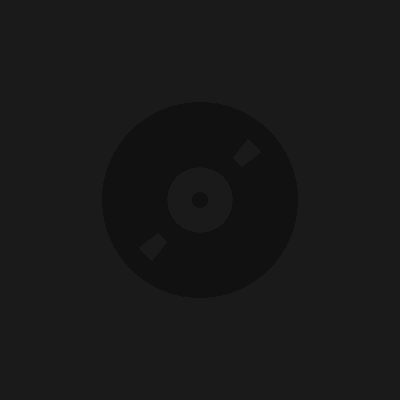
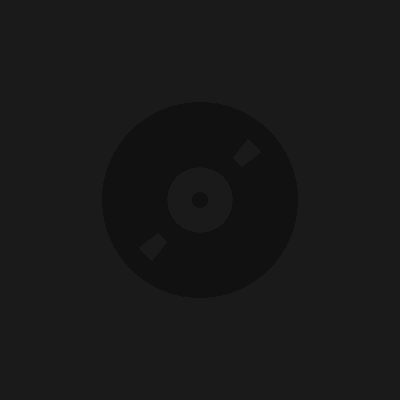
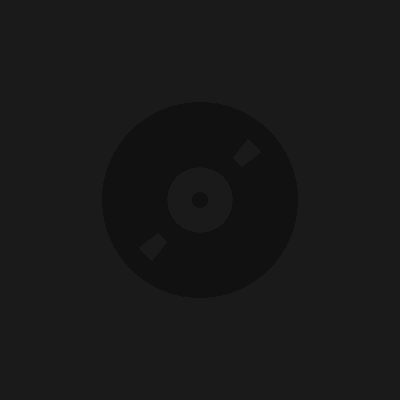
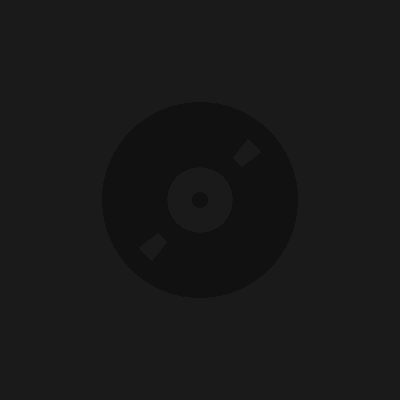
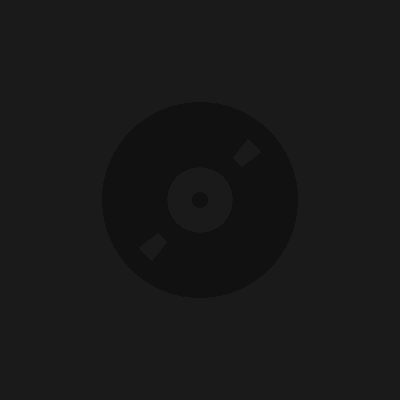
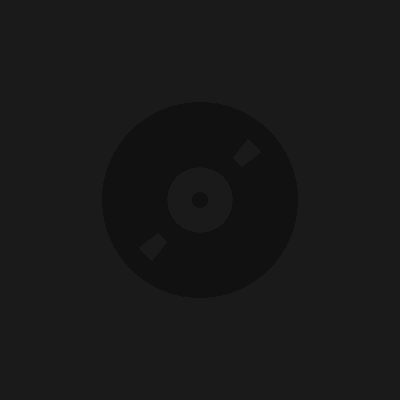
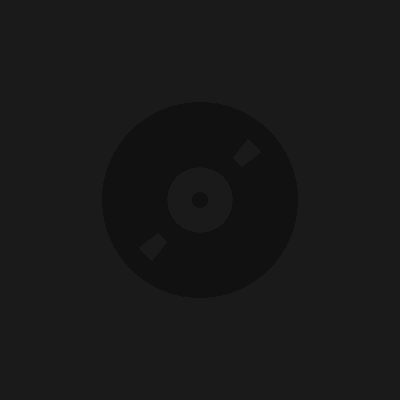
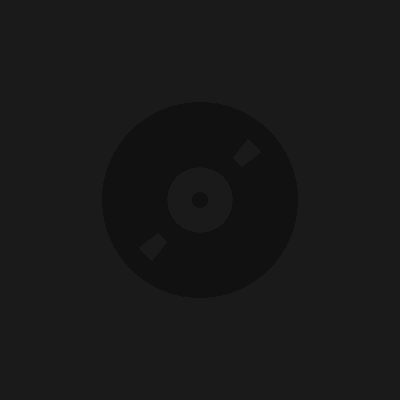
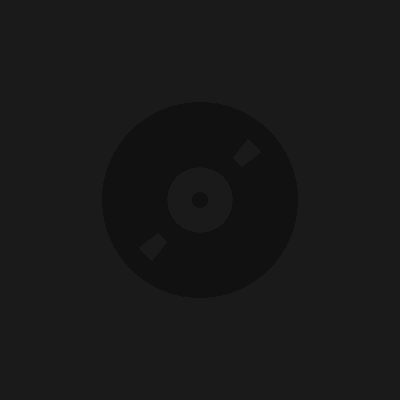
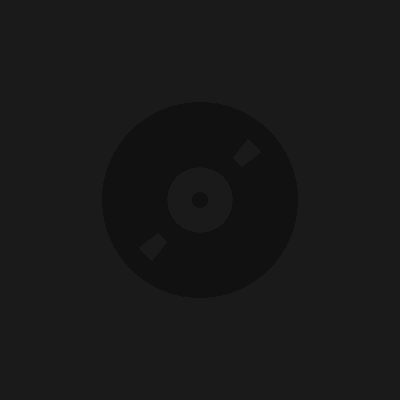
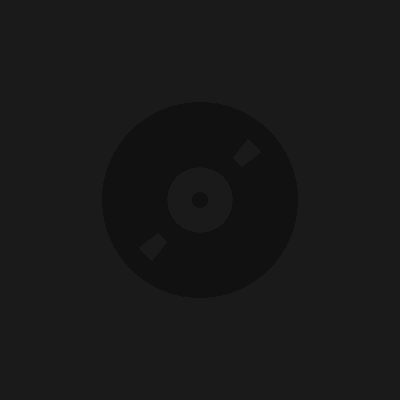
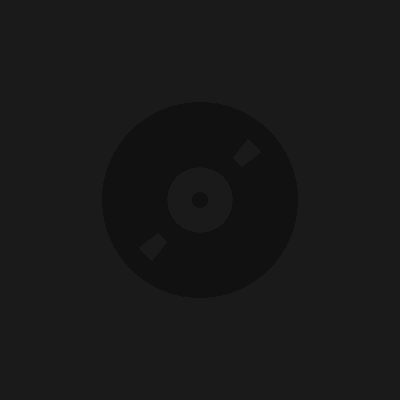
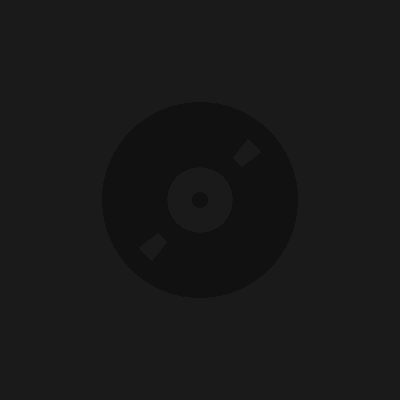
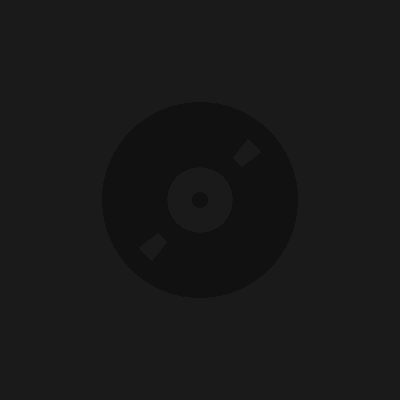
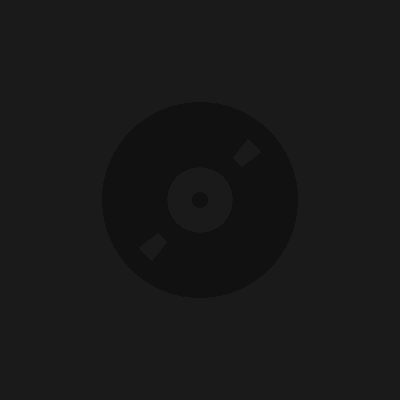
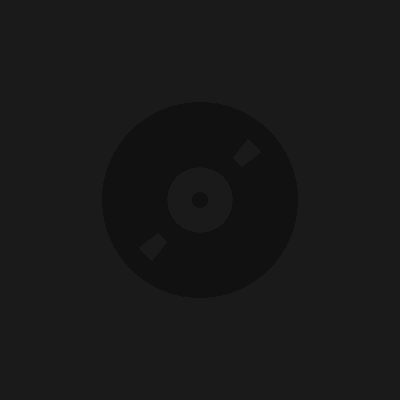
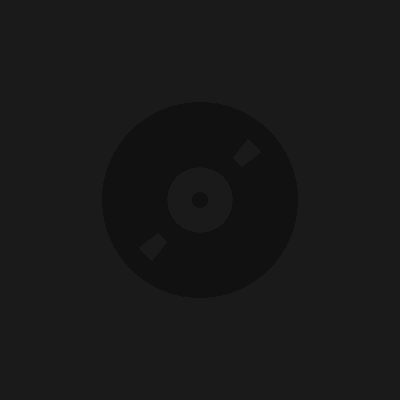
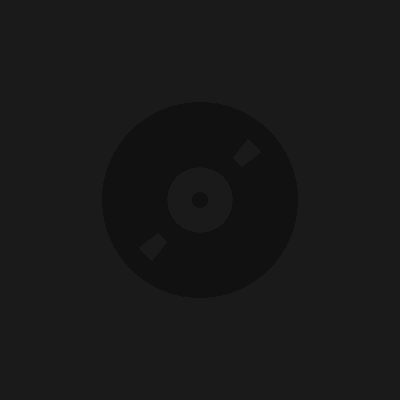
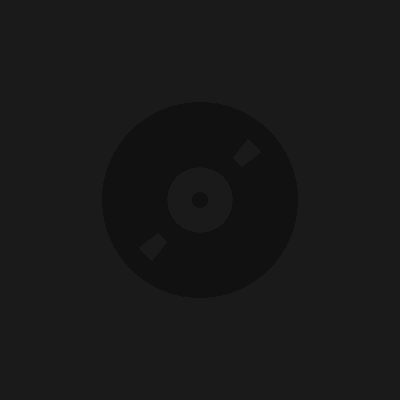
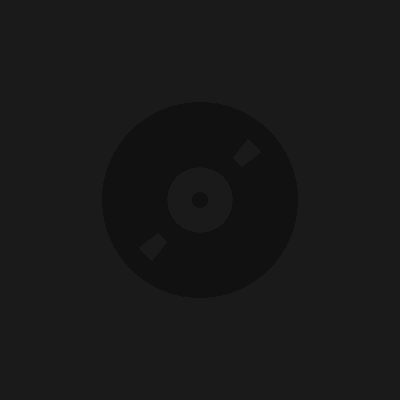
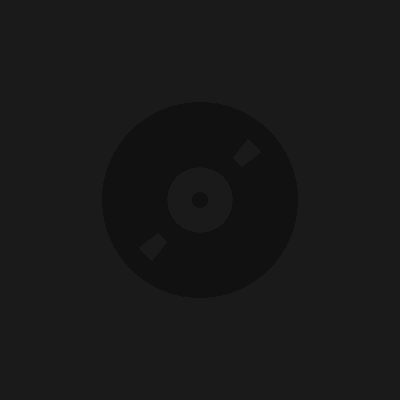
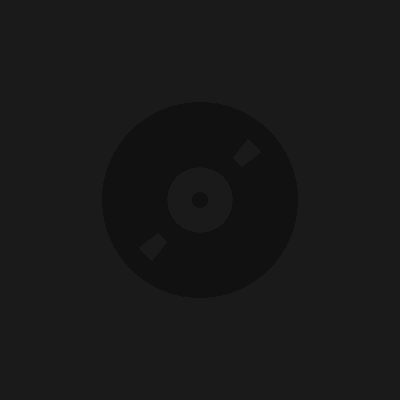
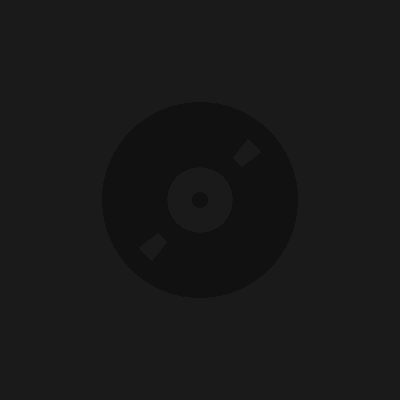
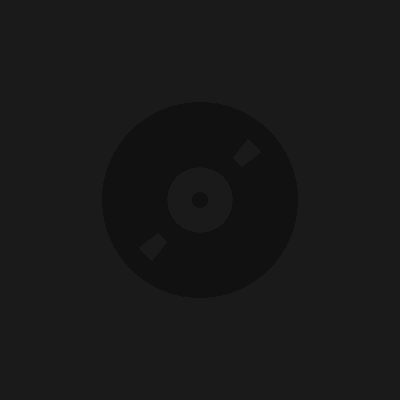
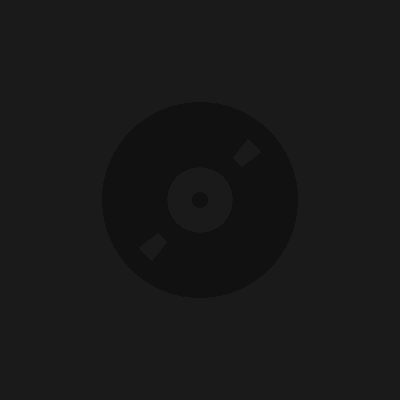
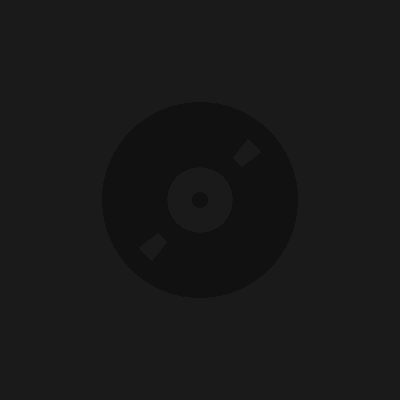
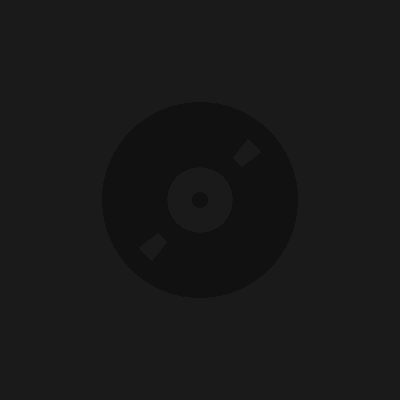
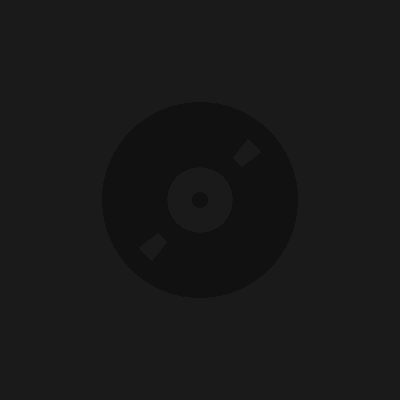
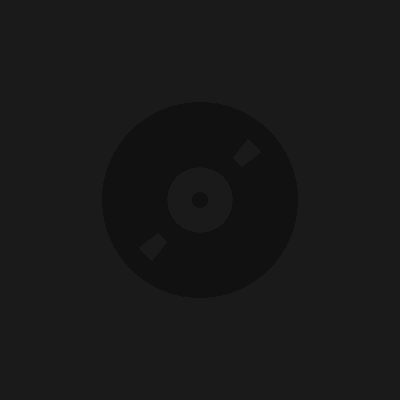
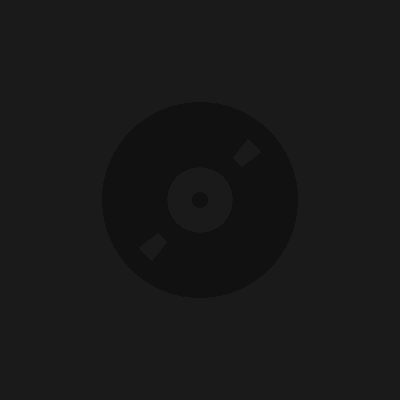
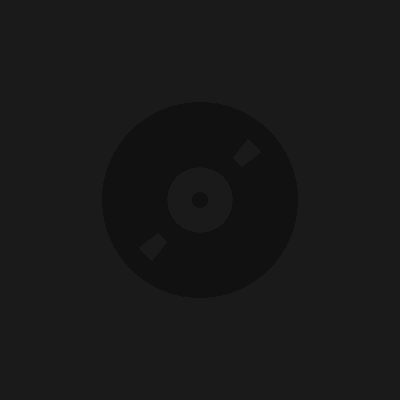
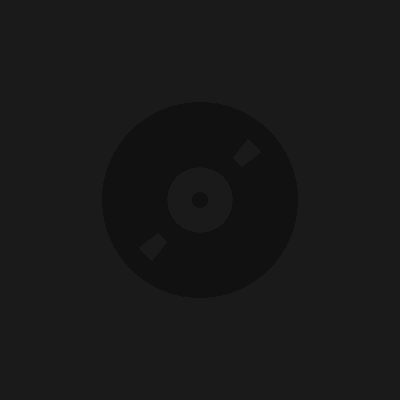
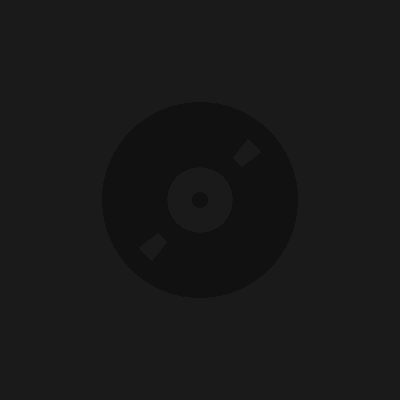
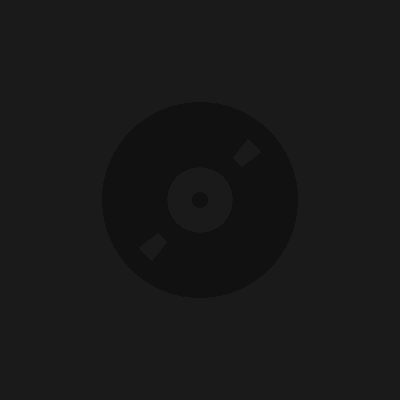
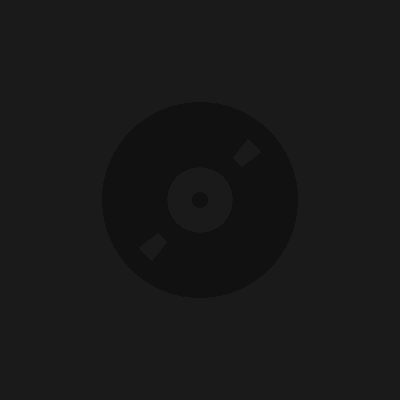
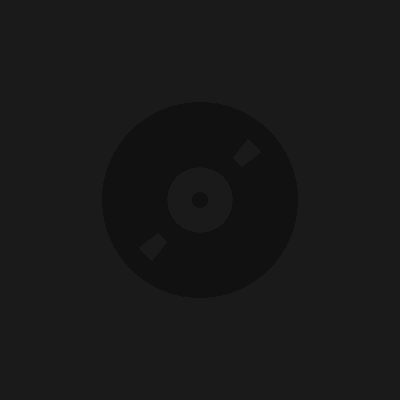
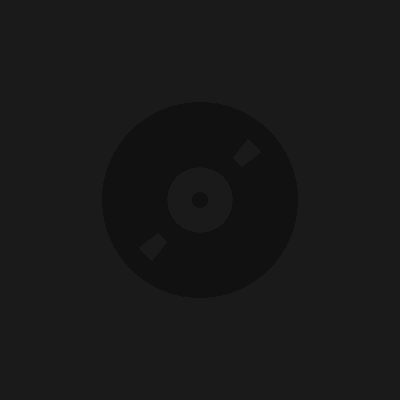
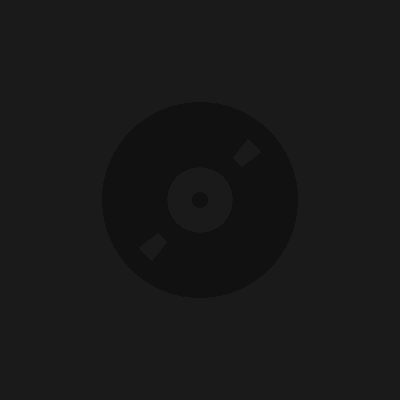
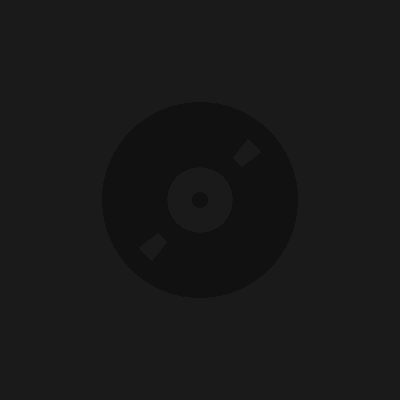
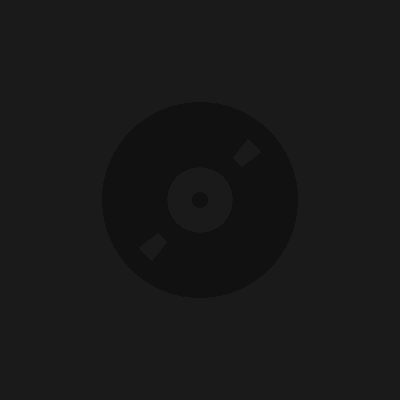
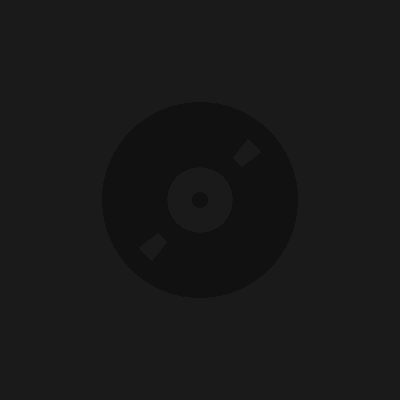
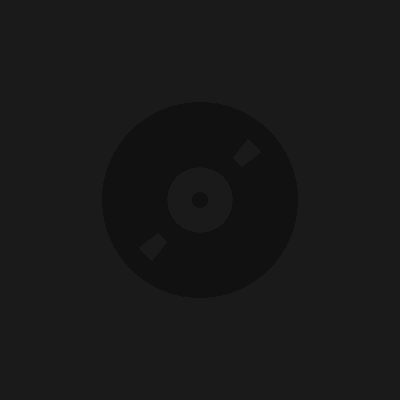
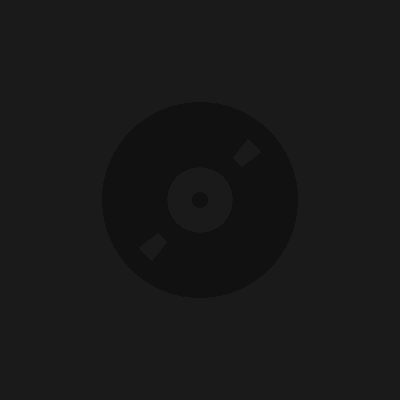
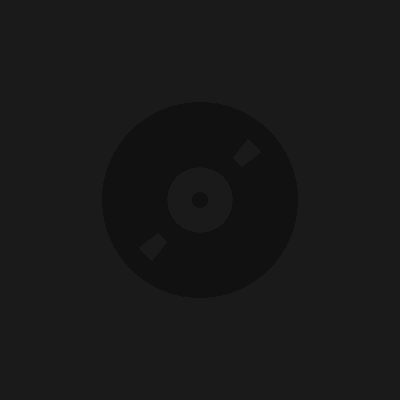
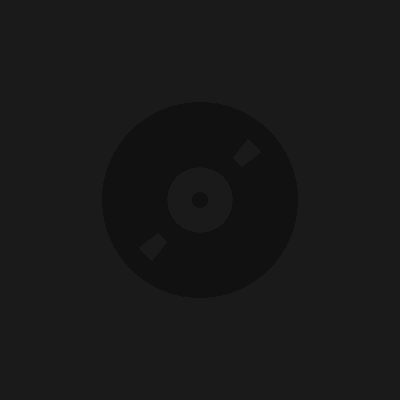
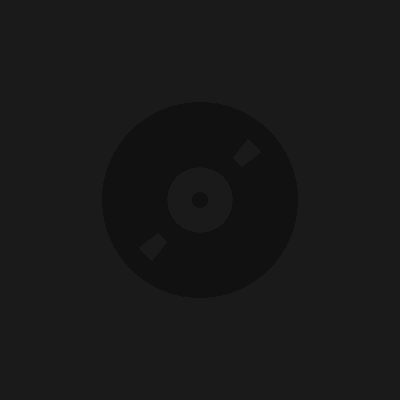
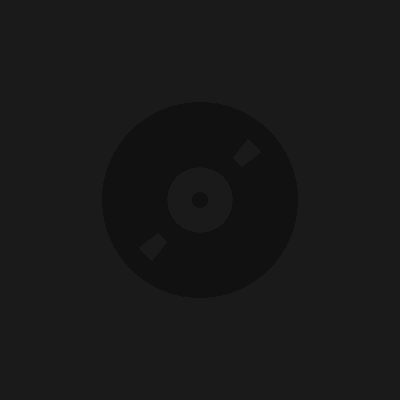
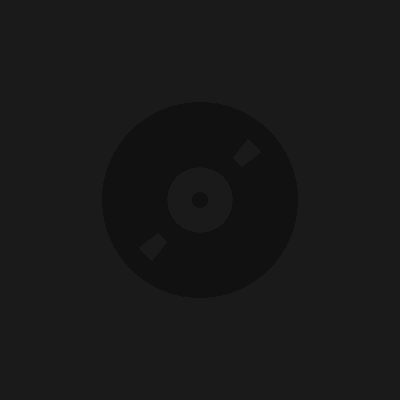
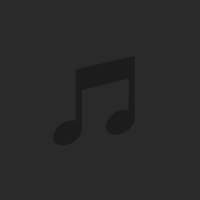

In [19]:
print(soup)

In [20]:
# selenium 종료
driver.close()

In [21]:
# 노래제목 가져오기
song_list = soup.select('div.title_badge_wrap span.inner_cell a')

In [22]:
print(len(song_list))

100


In [24]:
print(song_list[0])

<a class="link_text" href="/track/59261740" title="Ditto">Ditto</a>


In [26]:
print(song_list[0].get_text())

Ditto


In [27]:
# 가수리스트 가져오기
artists_list = soup.select('div.artist_sub')

In [28]:
print(len(artists_list))

100


In [29]:
print(artists_list[0])

<div class="artist_sub" title="NewJeans"><span><span><a class="link_artist" href="/artist/5615371"><span class="text">NewJeans</span></a><!-- --></span></span><span class="blind">아티스트명</span></div>


In [30]:
print(artists_list[0].get('title'))

NewJeans


In [31]:
# 순위 가져오기
ranks = soup.select('td.rank span.text')

for rank, song, artist in zip(ranks, song_list, artists_list):
    print(rank.get_text() + '. ' + song.get_text() + ' / ' + artist.get('title'))

1. Ditto / NewJeans
2. 사건의 지평선 / 윤하
3. Hype boy / NewJeans
4. After LIKE / IVE(아이브)
5. ANTIFRAGILE / LE SSERAFIM (르세라핌)
6. Attention / NewJeans
7. LOVE DIVE / IVE(아이브)
8. Nxde / (여자) 아이들
9. NOT SORRY (Feat. pH-1) (Prod. by Slom) / 이영지
10. 새삥 (Prod. ZICO) (Feat. 호미들) / 지코 (ZICO)
11. Candy / NCT DREAM
12. Monologue / 테이
13. Pink Venom / BLACKPINK
14. WHEN I MOVE / 카라(Kara)
15. 너의 모든 순간 / 성시경
16. TOMBOY / (여자) 아이들
17. Dreamers [Music from the FIFA World Cup Qatar 2022 Official Soundtrack] (Feat. FIFA Sound) / 정국, 방탄소년단
18. Shut Down / BLACKPINK
19. 그때 그 순간 그대로 (그그그) / WSG워너비(가야G)
20. 나의 X에게 / 경서
21. FEARLESS / LE SSERAFIM (르세라핌)
22. That's Hilarious / Charlie Puth
23. ELEVEN / IVE(아이브)
24. 자격지심 (Feat. ZICO) / BE'O(비오)
25. 마이웨이 (MY WAY) (Prod. R.Tee) / 저스디스(JUSTHIS), R.Tee, 던말릭(DON MALIK), 허성현 (Huh), KHAN, 맥대디(Mckdaddy), 로스(Los)
26. 드라마 / 아이유(IU)
27. Cookie / NewJeans
28. Rush Hour (Feat. j-hope of BTS) / Crush
29. 어떻게 이별까지 사랑하겠어, 널 사랑하는 거지 / AKMU(악뮤)
30. 그라데이션 / 10CM
31. 눈이 오잖아(Feat.헤이즈) 